In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 1. Load Dataset
# -----------------------------------------
DATA_PATH = "malnutrition_data.csv"  # sesuaikan path
df = pd.read_csv(DATA_PATH)

print("Jumlah data dan fitur:")
print(df.shape)

print("\nPreview data:")
print(df.head())

Jumlah data dan fitur:
(5000, 6)

Preview data:
   age_months  weight_kg   height_cm    muac_cm   bmi nutrition_status
0   12.345052   3.000000   54.134002  13.160919  10.0           normal
1   30.807200   5.459076   76.199180  13.944380  10.0           normal
2   15.723226   3.000000   60.280820  13.243565  10.0           normal
3   57.796256  10.103074  104.990471  14.105683  10.0           normal
4   40.321320   7.110583   85.277902  14.641630  10.0           normal


In [5]:
# 2. Informasi Dataset
# -----------------------------------------
print("\nInfo dataset:")
print(df.info())

print("\nMissing value per kolom:")
print(df.isna().sum())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_months        5000 non-null   float64
 1   weight_kg         5000 non-null   float64
 2   height_cm         5000 non-null   float64
 3   muac_cm           5000 non-null   float64
 4   bmi               5000 non-null   float64
 5   nutrition_status  5000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 234.5+ KB
None

Missing value per kolom:
age_months          0
weight_kg           0
height_cm           0
muac_cm             0
bmi                 0
nutrition_status    0
dtype: int64


In [6]:
# 3. Statistik Deskriptif
# -----------------------------------------
print("\nStatistik deskriptif fitur numerik:")
print(df.describe())


Statistik deskriptif fitur numerik:
        age_months    weight_kg    height_cm      muac_cm          bmi
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean     30.329540     5.285254    75.150343    13.441465    10.004274
std      17.152432     2.340930    17.332621     0.885567     0.047272
min       1.000686     3.000000    45.000000    10.261992    10.000000
25%      15.296946     3.000000    60.180769    12.849444    10.000000
50%      30.607902     4.648996    75.010021    13.635633    10.000000
75%      45.143969     7.043410    89.366628    14.082577    10.000000
max      59.989601    10.726919   105.000000    15.715103    11.285436


Keterangan Fitur:
1) age_months

Arti: usia anak dalam bulan

Tipe: numerik

Peran: fitur input

Relevansi:

Usia memengaruhi standar tinggi dan berat badan

Penting untuk menilai status gizi secara tepat

2) weight_kg

Arti: berat badan anak dalam kilogram

Tipe: numerik

Peran: fitur input utama

Relevansi:

Berat badan rendah sering berkaitan dengan gizi buruk

Digunakan langsung dalam perhitungan BMI

3) height_cm

Arti: tinggi badan anak dalam sentimeter

Tipe: numerik

Peran: fitur input utama

Relevansi:

Indikator utama pertumbuhan anak

Sangat berpengaruh pada klasifikasi gizi dan stunting

4) muac_cm

Arti: Lingkar Lengan Atas anak dalam sentimeter

Tipe: numerik

Peran: fitur input

Relevansi:

Indikator cepat status gizi akut

Sering dipakai di pemeriksaan lapangan

5) bmi

Arti: Body Mass Index anak

Tipe: numerik

Peran: fitur input turunan

Relevansi:

Menggabungkan berat dan tinggi

Memperkuat pemisahan antar kelas gizi

6) nutrition_status ← TARGET

Arti: status gizi anak

Tipe: kategorikal

Peran: label klasifikasi

Contoh nilai:

normal

kemungkinan kelas lain seperti underweight, severely_underweight, dll

Digunakan sebagai output model

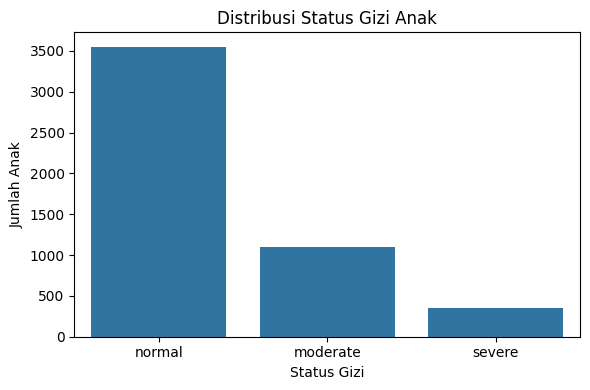

In [8]:
# 4. Distribusi Status Gizi (Target)
# -----------------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(x="nutrition_status", data=df)
plt.title("Distribusi Status Gizi Anak")
plt.xlabel("Status Gizi")
plt.ylabel("Jumlah Anak")
plt.tight_layout()
plt.show()

• Normal
Jumlah paling tinggi.
Mayoritas anak berada pada kondisi gizi baik.

• Moderate
Jumlah jauh lebih sedikit dibanding normal.
Masih ada anak dengan risiko kekurangan gizi.

• Severe
Jumlah paling rendah.
Kasus gizi buruk berat ada, tetapi tidak dominan.

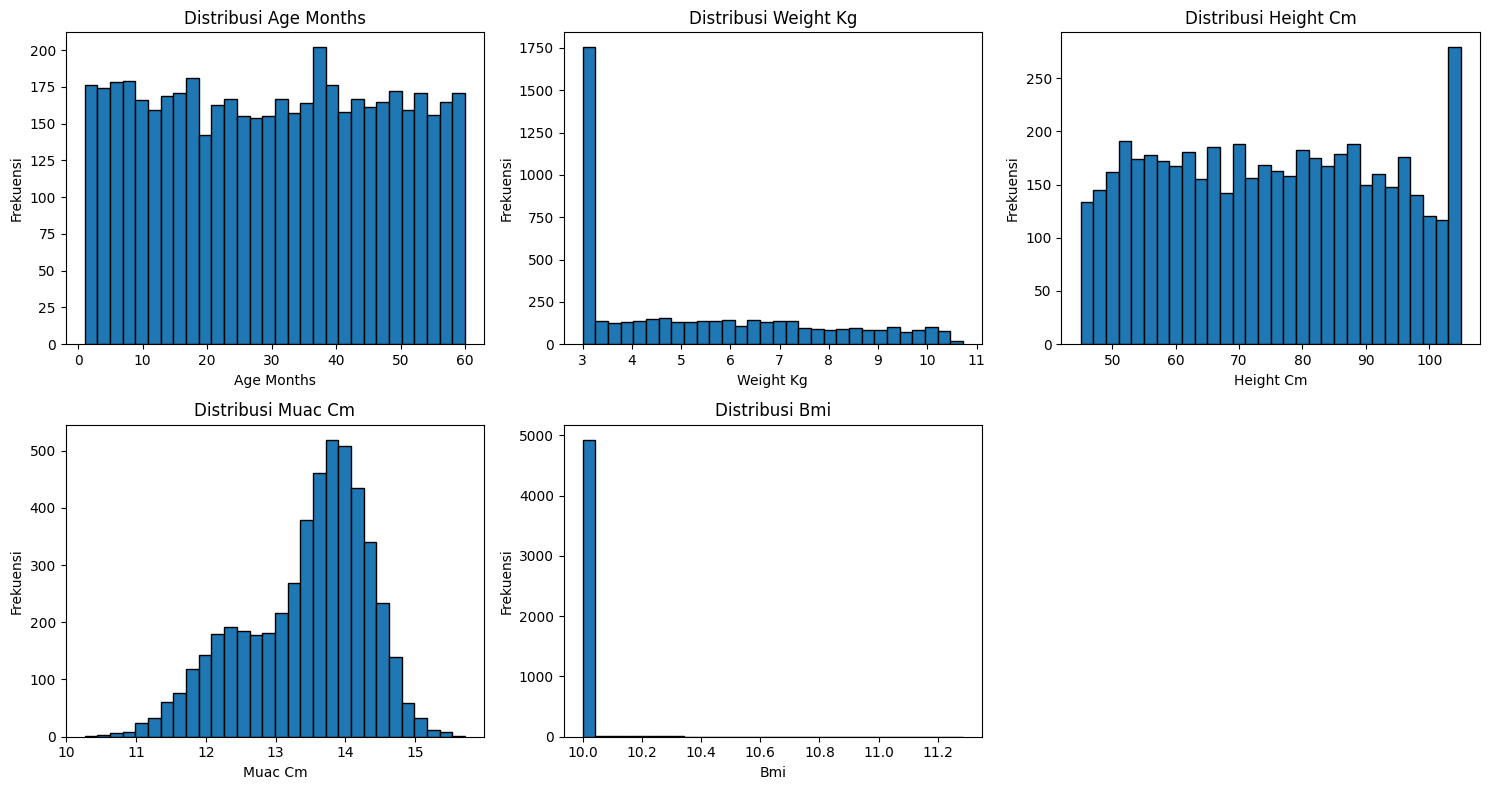

In [9]:
# 5. Histogram Fitur Numerik
# -----------------------------------------
numerical_cols = ["age_months", "weight_kg", "height_cm", "muac_cm", "bmi"]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=30, edgecolor="black")
    plt.title(f"Distribusi {col.replace('_', ' ').title()}")
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

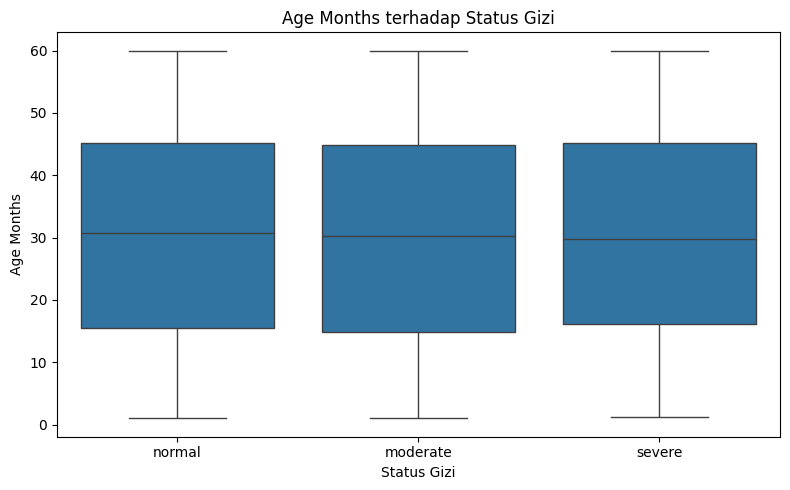

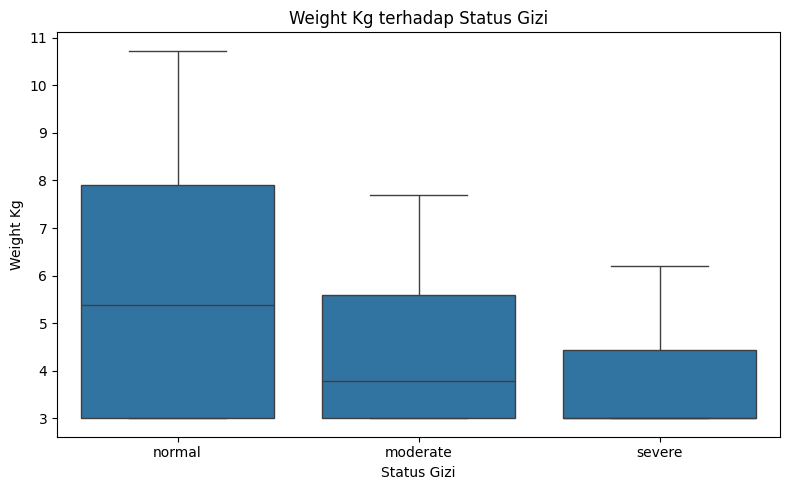

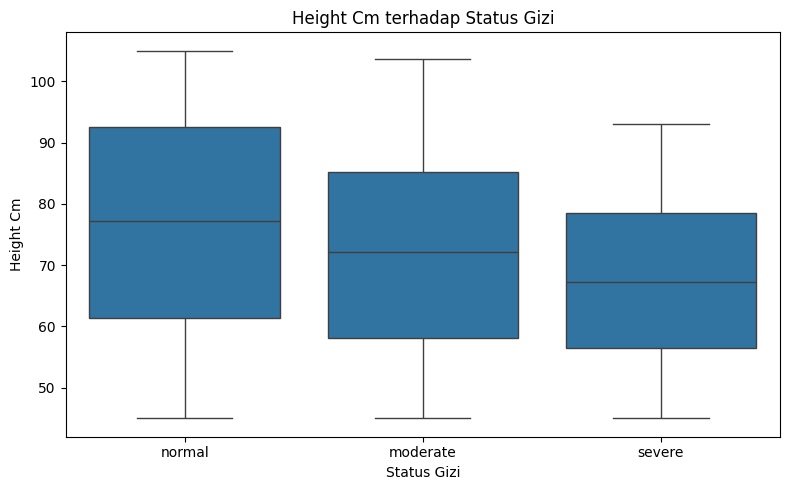

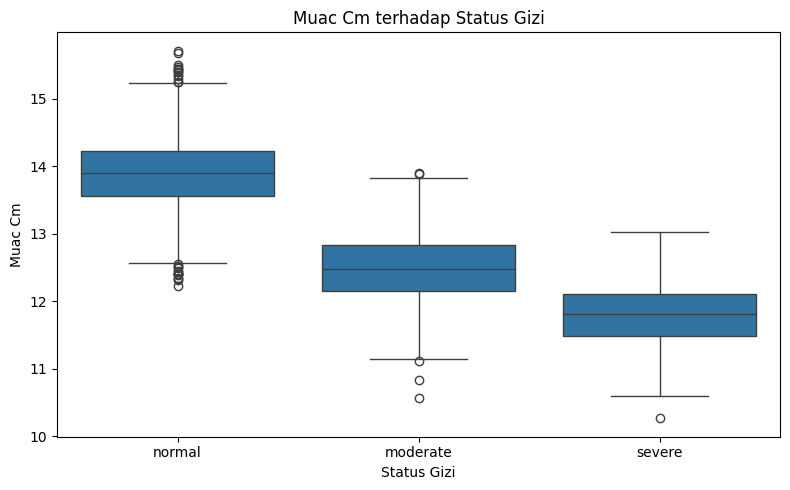

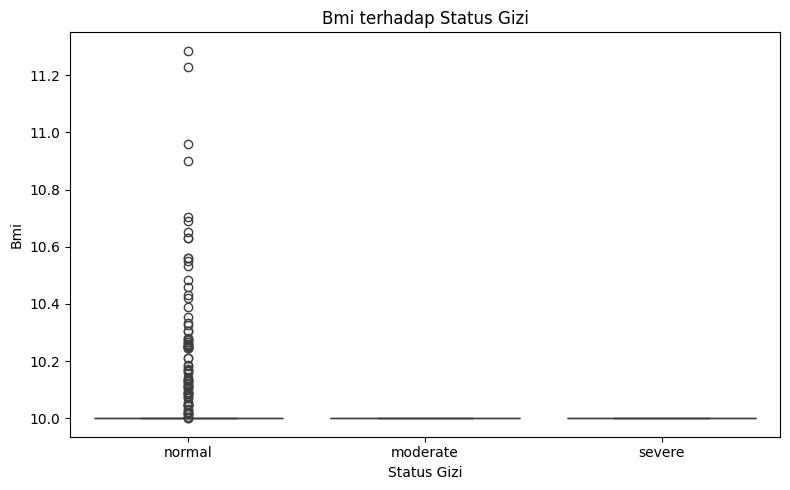

In [11]:
# 7. Hubungan Fitur dengan Status Gizi
# -----------------------------------------
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="nutrition_status", y=col, data=df)
    plt.title(f"{col.replace('_', ' ').title()} terhadap Status Gizi")
    plt.xlabel("Status Gizi")
    plt.ylabel(col.replace("_", " ").title())
    plt.tight_layout()
    plt.show()

Muac
Normal

• Median sekitar 13,8 cm
• Q1 sekitar 13,5 cm
• Q3 sekitar 14,2 cm
• Rentang utama sekitar 13,0–14,8 cm
• Ada outlier sampai ±15,5 cm dan ±12,5 cm

Makna.
Sebagian besar anak normal punya MUAC di atas 13,5 cm.

Moderate

• Median sekitar 12,4 cm
• Q1 sekitar 12,1 cm
• Q3 sekitar 12,8 cm
• Rentang utama sekitar 11,8–13,0 cm
• Ada nilai rendah mendekati 11,0 cm

Makna.
Banyak anak berada dekat ambang risiko gizi kurang.

Severe

• Median sekitar 11,7 cm
• Q1 sekitar 11,4 cm
• Q3 sekitar 12,0 cm
• Rentang utama sekitar 11,2–12,2 cm
• Nilai terendah sekitar 10,5 cm

Makna.
Mayoritas anak severe memiliki MUAC di bawah 12 cm.

Ringkasan angka penting

• Normal. MUAC dominan > 13,5 cm
• Moderate. MUAC dominan 12,0–13,0 cm
• Severe. MUAC dominan < 12,0 cm

Implikasi praktis.
• 12 cm bisa jadi batas awal risiko
• MUAC sangat kuat membedakan status gizi
• Cocok dipakai untuk klasifikasi dan skrining lapangan

BMI
Normal
• Median sekitar 10,0
• Q1 dan Q3 hampir 10,0
• Banyak titik di atas kotak sampai sekitar 11,2
Makna. Nilai BMI normal berkumpul di satu angka dengan banyak outlier.

Moderate
• Median sekitar 10,0
• Hampir tidak ada sebaran
Makna. Nilai BMI tidak bervariasi.

Severe
• Median sekitar 10,0
• Sebaran nyaris nol
Makna. BMI tidak membedakan status gizi.

Interpretasi penting

• BMI tidak informatif pada data ini
• Nilai BMI terlihat konstan atau dibulatkan
• Variabel ini kurang layak dipakai sebagai fitur utama

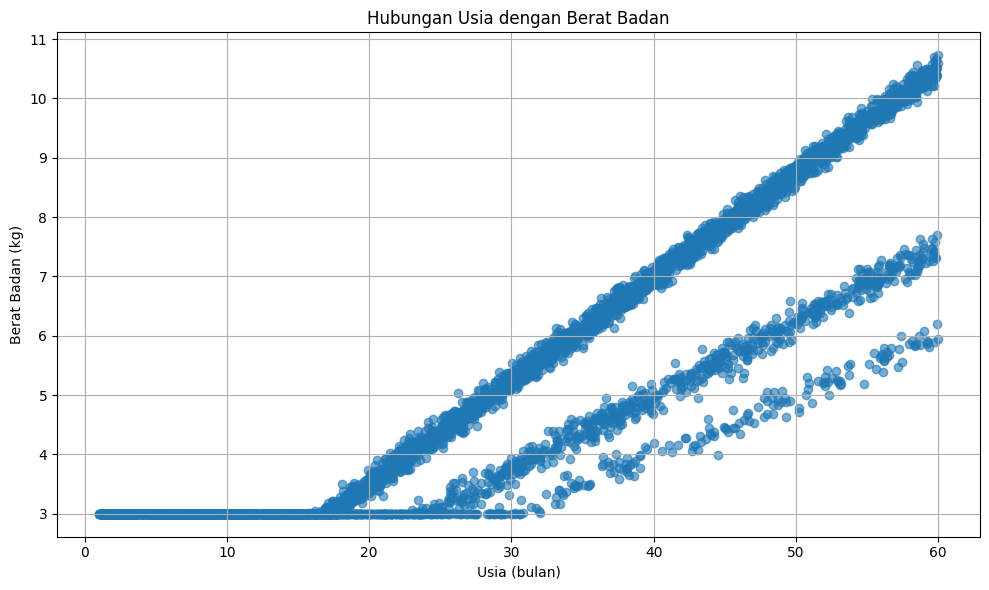

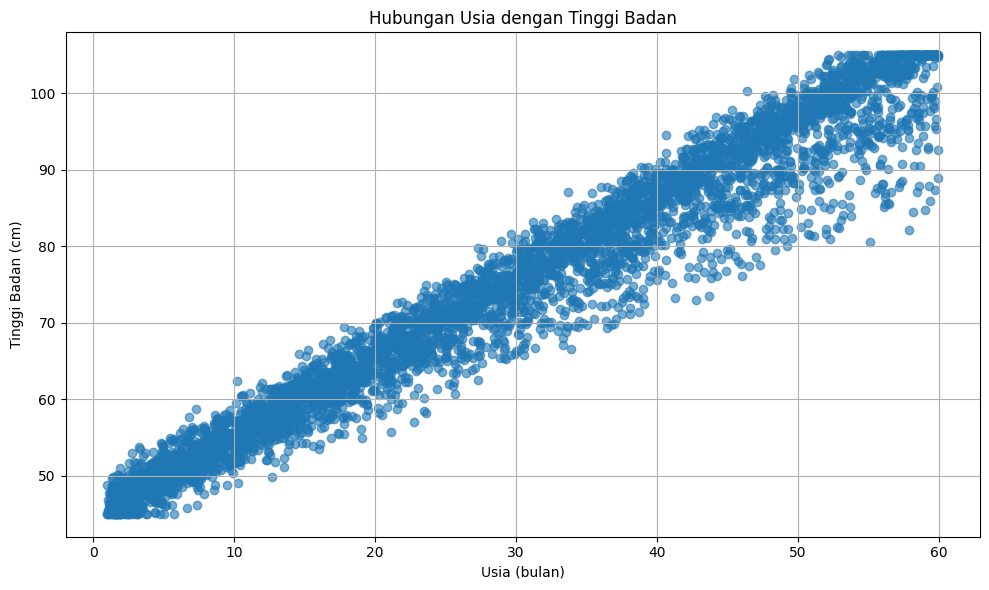

In [12]:
# 8. Scatter Plot Usia vs Berat dan Tinggi
# -----------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(df["age_months"], df["weight_kg"], alpha=0.6)
plt.title("Hubungan Usia dengan Berat Badan")
plt.xlabel("Usia (bulan)")
plt.ylabel("Berat Badan (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df["age_months"], df["height_cm"], alpha=0.6)
plt.title("Hubungan Usia dengan Tinggi Badan")
plt.xlabel("Usia (bulan)")
plt.ylabel("Tinggi Badan (cm)")
plt.grid(True)
plt.tight_layout()
plt.show()

Matriks Korelasi:
            age_months  weight_kg  height_cm   muac_cm       bmi
age_months    1.000000   0.899539   0.976712  0.012285  0.047936
weight_kg     0.899539   1.000000   0.942813  0.257589  0.064997
height_cm     0.976712   0.942813   1.000000  0.139794  0.031821
muac_cm       0.012285   0.257589   0.139794  1.000000  0.042135
bmi           0.047936   0.064997   0.031821  0.042135  1.000000


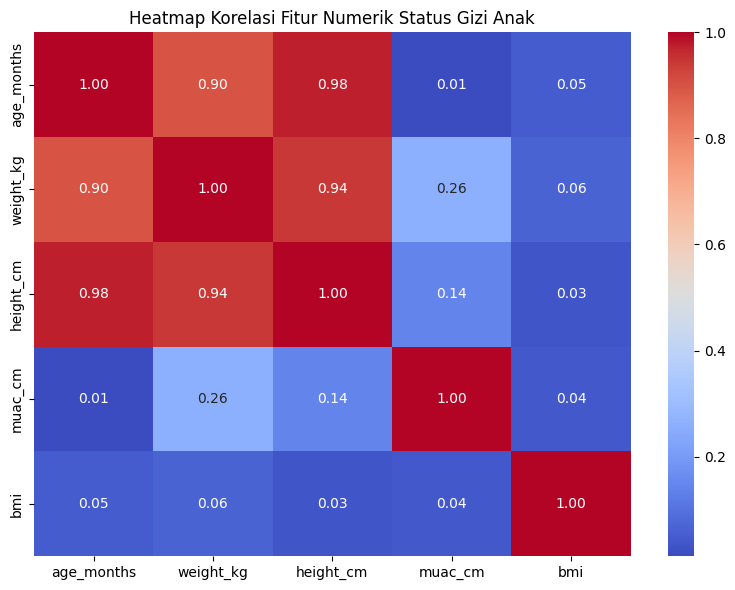

In [13]:
# Hitung korelasi
correlation_matrix = df[numerical_cols].corr()

# Tampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Heatmap Korelasi Fitur Numerik Status Gizi Anak")
plt.tight_layout()
plt.show()